# Regularization Lab

In [1]:
# import the libraries
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

C:\Users\Deena\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# loading data
data = pd.read_csv(r"C:\Users\Deena\Downloads\bike+sharing+dataset\hour.csv")

In [3]:
# reading data
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# copy the data into another dataframe
df = data.copy()

In [8]:
# dropping the column dteday
df.drop(['dteday'], axis=1, inplace=True)

In [9]:
# finding and arranging correlation coefficient values
df.corr()['cnt'].sort_values()

hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
instant       0.278379
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [10]:
#data1 = df[['hum', 'weathersit', 'hr','atemp', 'temp', 'casual', 'registered', 'cnt']]
data1 = df.copy()
data1

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


#copy the data
df_mm = data1.copy()
  
#apply normalization techniques
for column in df_mm.columns:
    df_mm[column] = (df_mm[column] - df_mm[column].min()) / (df_mm[column].max() - df_mm[column].min())    

print(df_mm)

In [11]:
X = data1.iloc[:,:-1].values
X 

array([[1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.0000e+00,
        1.3000e+01],
       [2.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 8.0000e+00,
        3.2000e+01],
       [3.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 5.0000e+00,
        2.7000e+01],
       ...,
       [1.7377e+04, 1.0000e+00, 1.0000e+00, ..., 1.6420e-01, 7.0000e+00,
        8.3000e+01],
       [1.7378e+04, 1.0000e+00, 1.0000e+00, ..., 1.3430e-01, 1.3000e+01,
        4.8000e+01],
       [1.7379e+04, 1.0000e+00, 1.0000e+00, ..., 1.3430e-01, 1.2000e+01,
        3.7000e+01]])

In [12]:
# Add a column of ones for the intercept term
#X = np.insert(X, 0, 1, axis=1)
#X

In [13]:
#y = preprocessing.scale(df['cnt'])
Y = data1.iloc[:,-1].values
Y

array([16, 40, 32, ..., 90, 61, 49], dtype=int64)

In [14]:
# Normalize the target variable (y) and features (X) by taking the logarithm
Y = np.log1p(Y)
X = np.log1p(X)
print(X)
print(Y)

[[0.69314718 0.69314718 0.         ... 0.         1.38629436 2.63905733]
 [1.09861229 0.69314718 0.         ... 0.         2.19722458 3.49650756]
 [1.38629436 0.69314718 0.         ... 0.         1.79175947 3.33220451]
 ...
 [9.76296032 0.69314718 0.69314718 ... 0.15203416 2.07944154 4.4308168 ]
 [9.76301786 0.69314718 0.69314718 ... 0.12601572 2.63905733 3.8918203 ]
 [9.7630754  0.69314718 0.69314718 ... 0.12601572 2.56494936 3.63758616]]
[2.83321334 3.71357207 3.49650756 ... 4.51085951 4.12713439 3.91202301]


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state=42)
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (17379, 15)
Shape of Y: (17379,)


## L2 Regularization

In [16]:
# Lists to store RMSE and RMSLE values during training
rmse_values = []
rmsle_values = []

# gradient descent using matrix dot product
A = 0.001
epochs = 1000

# defining lambda for lasso L1 regularization
lambda_l2 = 0.1

n = float(len(Y_train))
print("N:",n)

# t - theta - making a matrix of the dimension [no of columns of X, 1]
t1 = np.zeros(X_train.shape[1])
#t1 = np.random.rand(X_train.shape[1])
print("t1: ",t1.shape)

for i in range(epochs):
    # taking a dot product of the matrices X and t1 and add t0
    Y_pred = np.dot(X_train, t1) #+ t0         
    #print("Y_pred: ",Y_pred.shape)
    
    err = Y_pred - Y_train
    # partial derivative wrt t1, here we would add pd of the l2 function
    D_t1 = (2/n) * (np.dot(err, X_train) + (2 * lambda_l2 * t1))      
    #print("D_t1: ",D_t1.shape)
    
    # updatation of t
    t1 = t1 - A * D_t1                          
   
    # Calculate RMSE and RMSLE and store in lists
    mse = np.square(np.subtract(Y_test, (np.dot(X_test, t1)))).mean() 
    rmse = math.sqrt(mse)
    rmse_values.append(rmse)
    #rmse_values.append(np.sqrt(mean_squared_error(Y_test, np.dot(X_test, t1) ))) 
    msle = np.square((np.log(Y_test + 1) - np.log((np.dot(X_test, t1) + 1)))).mean()
    rmsle = math.sqrt(msle)
    rmsle_values.append(rmsle)
    #rmsle_values.append(np.sqrt(mean_squared_log_error(Y_test, np.dot(X_test, t1)))) 

    
# Print the final coefficients
print("Coefficients:\n", t1)
print("RMSE: ", rmse_values[-1])
print("RMSLE: ",rmsle_values[1])

N: 12165.0
t1:  (15,)
Coefficients:
 [ 0.05756769  0.00487554 -0.00686029 -0.01603646  0.13442191 -0.00315877
  0.02622546  0.03442765  0.01029921  0.00411879  0.00410473 -0.00122843
  0.0077133   0.29467273  0.66879953]
RMSE:  0.18758850428562315
RMSLE:  0.6444134599332375


In [17]:
from sklearn.linear_model import Ridge

RR= Ridge(alpha=0.1) # Regularization parameter

#Fit the instance on the data and then predict the expected value.
RR= RR.fit(X_train, Y_train)
y_pred1= RR.predict(X_test)
print("R2 score using Ridge Regularization from the library: ",RR.score(X_test, Y_test))

R2 score using Ridge Regularization from the library:  0.9965774138486625


In [18]:
# r2 score for gradient descent
y_pred2 = np.dot(X_test, t1)
print("R2 Score when gradient descent along with Ridge Regularization is used: ",r2_score(Y_test, y_pred2))

# r2 score using library
model = LinearRegression()
model.fit(X_train, Y_train)
print("R2 score with only regression using library: ",model.score(X_test, Y_test))

R2 Score when gradient descent along with Ridge Regularization is used:  0.9825015804515373
R2 score with only regression using library:  0.996577420726807


In [19]:
# difference 

# 1.RR - ridge done using library, 2.model - LR using library, 3.r2 - lr with gd and regularization

print("Difference:")
print("1. Ridge using library and from scratch using gradient descent: ", RR.score(X_test, Y_test)-r2_score(Y_test, y_pred2))
print("2. Applying only linear regression using library and Ridge using library: ", model.score(X_test, Y_test)-RR.score(X_test, Y_test))
print("3. Applying only linear regression and from scratch using gradient descent: ", model.score(X_test, Y_test)-r2_score(Y_test, y_pred2))

Difference:
1. Ridge using library and from scratch using gradient descent:  0.014075833397125148
2. Applying only linear regression using library and Ridge using library:  6.878144498401184e-09
3. Applying only linear regression and from scratch using gradient descent:  0.014075840275269647


## L1 regularization

In [20]:
from sklearn.linear_model import Lasso

LR= Lasso(alpha=1.0) # Regularization parameter
LR= LR.fit(X_train, Y_train)
y_pred3 = LR.predict(X_test)

In [21]:
# model - applying linear regression without regularization
# LR - lasso reguarization
print("Difference between model applied wihtout and with L1 regularization:\n ", model.score(X_test, Y_test)-LR.score(X_test, Y_test))

Difference between model applied wihtout and with L1 regularization:
  0.2661984978882438


## Elastic Net Regularization

In [22]:
EN = ElasticNet(random_state=0)
EN = EN.fit(X_train, Y_train)
y_pred3 = EN.predict(X_test)

In [23]:
# model - applying linear regression without regularization
# EN - Elastic Net regularization
print("Difference between model applied wihtout and with Elastic Net regularization:\n ", model.score(X_test, Y_test)-EN.score(X_test, Y_test))

Difference between model applied wihtout and with Elastic Net regularization:
  0.13863047237238424


### Visualizing the difference

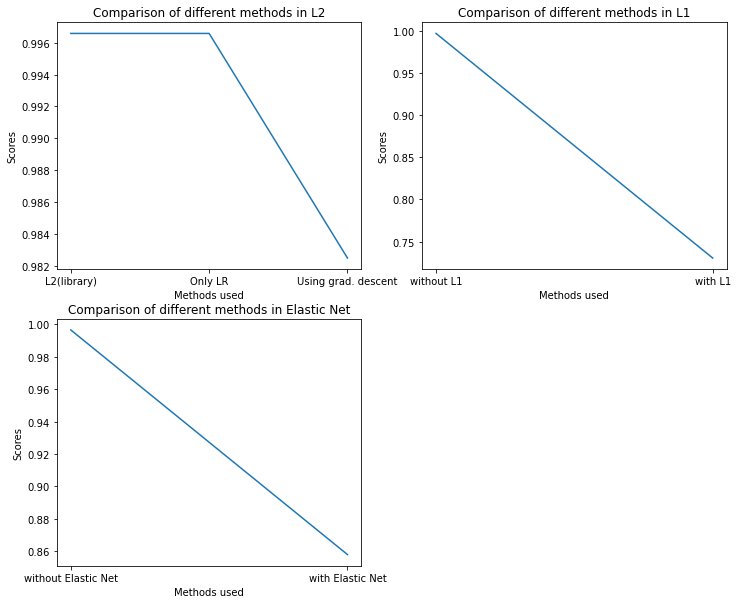

In [38]:
# for L2 regularization
x1 = ['L2(library)', 'Only LR', 'Using grad. descent']
y1 = [RR.score(X_test, Y_test), model.score(X_test, Y_test), r2_score(Y_test, y_pred2)]
x2 = ['without L1', 'with L1']
y2 = [model.score(X_test, Y_test), LR.score(X_test, Y_test)]
x3 = ['without Elastic Net', 'with Elastic Net']
y3 = [model.score(X_test, Y_test), EN.score(X_test, Y_test)]

plt.figure(figsize=(12,10))
plt.subplot(221)
plt.plot(x1, y1)
plt.xlabel("Methods used")
plt.ylabel("Scores")
plt.title("Comparison of different methods in L2")

plt.subplot(222)
plt.plot(x2, y2)
plt.xlabel("Methods used")
plt.ylabel("Scores")
plt.title("Comparison of different methods in L1")

plt.subplot(223)
plt.plot(x3, y3)
plt.xlabel("Methods used")
plt.ylabel("Scores")
plt.title("Comparison of different methods in Elastic Net")

plt.show()